In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
from tqdm import tqdm
import torch.optim as optim
import random

In [75]:
class RandomNoise(object):
    def __init__(self):
      pass
    def __call__(self, img):
      new_img = img.clone().normal_(0,0.01) + img
      return new_img / 1.1 + 0.1
          
transform = transforms.Compose(
    [transforms.ToTensor(),
     RandomNoise(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7f22e08379b0>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 399, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 378, in _shutdown_workers


  dog horse   cat   cat


    self.worker_result_queue.get()
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 337, in get
    return _ForkingPickler.loads(res)
  File "/usr/local/lib/python3.6/dist-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/usr/lib/python3.6/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/usr/lib/python3.6/multiprocessing/resource_sharer.py", line 87, in get_connection
    c = Client(address, authkey=process.current_process().authkey)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 493, in Client
    answer_challenge(c, authkey)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 732, in answer_challenge
    message = connection.recv_bytes(256)         # reject large message
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/usr/lib/pytho

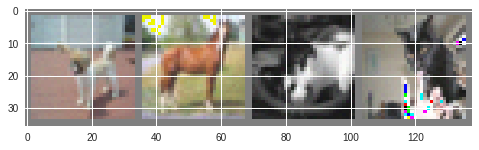

In [76]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [77]:
losses_ratio = []
for ratio in tqdm(range(1,6)):
  losses_ratio.append(fit_and_get_loss(data_batch_size=ratio))




  0%|          | 0/5 [00:00<?, ?it/s]

2.2950554547309876
2.2047285825014113
2.089631273984909
1.9778574670553208
1.9402877272367478
1.869110813975334
1.7862655876874924
1.7630506249666213
1.74253535759449
1.7447371401786804
1.7263664184808731
1.7060924059152602
1.731740307688713
1.6920881983041762
1.6509051487445832
1.6516890524625778
1.6489924191236496
1.594414025425911
1.6126508088111877
1.589266388297081
1.5433724353313445
1.5634877992868423
1.581491107225418
1.5551853461265563
1.5910468331575394
1.5690748355388642
1.555700558423996
1.5499966167211532
1.5182914546728135
1.5576832659244537
1.6038961013555526
1.5504291226863862
1.5358572402000428
1.5158526672124863
1.5155945823192596
1.4452641446590424
1.573174600481987
1.5722510257959366
1.4898575266599656
1.489452426314354
1.4667276768684387
1.5269341918230057
1.4973864687681198
1.5046768395900727
1.4863769836425782
1.5249455853700637
1.4455761107206344
1.5018356823921204
1.4549453094005584





 20%|██        | 1/5 [02:53<11:33, 173.38s/it]

1.5027992745637895
Finished Training
2.300524450302124
2.194956652522087
2.047693638384342
1.8780128453969955
1.7681478492617606
1.7543349456191062
1.701951039016247
1.6123856564760208
1.6324288892149925
1.6035447491407395
1.5740145760178565
1.5523897688984871
1.495983314871788
1.4951826400756836
1.5261653178930283
1.4912571580410003
1.4855424801707269
1.4889923213720322
1.4400796852707862
1.4733694651722908
1.4321620411872864
1.4144346556663514
1.372022128880024
1.4016751222014427





 40%|████      | 2/5 [04:34<07:35, 151.77s/it]

1.4100747953653336
Finished Training
2.296596411943436
2.1413287044763565
1.9735669026970863
1.9015545787215233
1.76510838881135
1.6843670710623264
1.6374496783316135
1.601687054157257
1.5448476336747408
1.5531170787960291
1.5024195266366005
1.4961789598912
1.4651343398056924
1.421215547144413
1.4047156774047762
1.410980745896697





 60%|██████    | 3/5 [05:51<04:18, 129.42s/it]

Finished Training
2.292980803012848
2.090147451758385
1.936912139236927
1.8069012140631675
1.7032546795606613
1.6682279615998268
1.6001428979039192
1.55676713180542
1.5420826501250267
1.523411236166954
1.4959096051454543
1.4622460235953332
2.141298819601536
1.374832177579403
1.3733344793319702
1.3341250107586384
1.3481973648369312
1.3277632187902928
1.2913314521312713
1.3019926286041736
1.2967503729760648
1.2861779602468013
1.2205133934915067
1.258564356446266





 80%|████████  | 4/5 [08:03<02:10, 130.14s/it]

Finished Training
2.294505178451538
2.1210327417850494
2.0038496849536895
1.8980311689376832
1.8048528813123703
1.6708081532120704
1.6538561270833017
1.59092197650671
1.5313600308597088
1.4801382692158223
1.4328616885542869
1.457524877279997
1.437427622884512
1.4038083923161029
1.4099850917756558
1.3850992239415645
1.3261539039313792
1.325001442193985
1.3383652242273092





100%|██████████| 5/5 [09:59<00:00, 125.67s/it]




1.323410772398114
Finished Training


In [0]:
losses_ratio[3] = losses_ratio[3][:12]

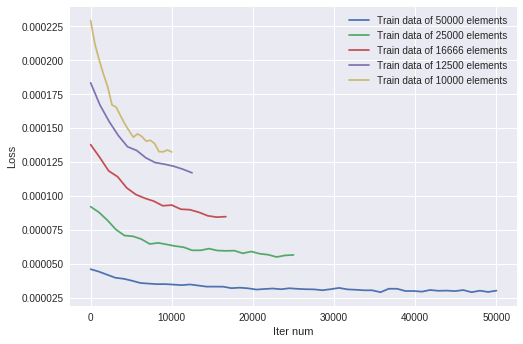

In [79]:
legend = []
for ratio in range(5):
  iter_num = np.linspace(1, 50000 / (ratio + 1), len(losses_ratio[ratio]))
  plt.plot(iter_num, np.array(losses_ratio[ratio]) / (50000 / (ratio + 1)))
  legend.append('Train data of ' + str(int(50000.0 / (ratio + 1))) + ' elements')

plt.legend(legend)
plt.ylabel('Loss')
plt.xlabel('Iter num')
plt.show()
from google.colab import files
plt.savefig('LossHW4.png')
files.download('LossHW4.png') 

In [0]:
def fit_and_get_loss(data_batch_size=1):
  trainloader = torch.utils.data.DataLoader(trainset, batch_size=data_batch_size,
                                          shuffle=True, num_workers=2)

  losses = []
  net = Net()

  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
  loss_val = 0.0
  epoch_size = 2
  if data_batch_size == 1 or data_batch_size == 2 or data_batch_size == 3:
    epoch_size = 1
  for epoch in range(epoch_size):

      running_loss = 0.0
      for i, data in enumerate(trainloader, 0):
          inputs, labels = data

          optimizer.zero_grad()
          outputs = net(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()
          loss_val += loss.item()
          if i % 1000 == 999:
            losses.append(loss_val / 1000)
            print(loss_val / 1000)
            loss_val = 0.0

  print('Finished Training')
  return losses


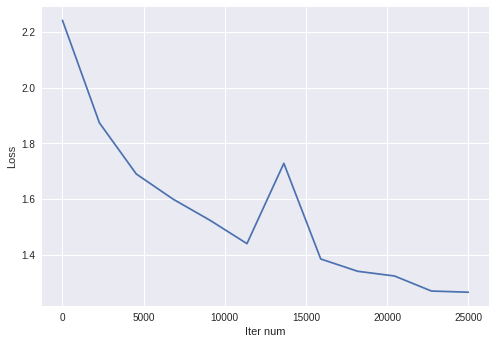

In [24]:
iter_num = np.linspace(1, 25000, 12)
plt.plot(iter_num, losses)
plt.ylabel('Loss')
plt.xlabel('Iter num')
plt.show()
from google.colab import files
plt.savefig('LossHW4.png')
files.download('LossHW4.png') 

In [0]:
outputs = net(images)

In [17]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 57 %


In [18]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 65 %
Accuracy of   car : 53 %
Accuracy of  bird : 33 %
Accuracy of   cat : 44 %
Accuracy of  deer : 47 %
Accuracy of   dog : 51 %
Accuracy of  frog : 73 %
Accuracy of horse : 55 %
Accuracy of  ship : 77 %
Accuracy of truck : 73 %
